# <center>  Perceptron learning algorithm, Pocket learning algorithm, Delta rule learning algorithm</center> 

# I. Perceptron learning algorithm

<div style="margin-left:60px">
<strong>Input:</strong> $S=\left\{\left(x_1, y_1\right), \ldots,\left(x_n, y_n\right)\right\}$ and $w_0$.<br><br>
<strong>Output:</strong> $w^*, t$ and $L_S\left(w^*\right)$<br><br>
<strong>Start:</strong> $w \leftarrow w_0$ and $t \leftarrow 0$<br><br>
<div style="margin-left:20px">
<strong>Compute:</strong> $\quad L_S(w)=\frac{1}{n} \sum_{i=1}^n 1_{\left[w^T x_i \neq y_i\right]}$<br><br>

<strong>While</strong> $\left(L_S(w) !=0\right)$ :<br>
<div style="margin-left:30px">
    <strong>for</strong> $i=1, \ldots, n$ :<br>
    <div style="margin-left:43px">
<strong>if</strong> signe $\left(w^T x_i\right) \cdot y_i<0$<br>
$w \leftarrow w+y_i x_i$<br>
$t \leftarrow t+1$<br>
<strong>endif</strong><br>
    </div>
<strong>endfor</strong><br>
    </div>
<strong>compute</strong> $L_S(w)$<br>
<strong>endWhile </strong><br><br>
    <strong>Return</strong> $w^* \leftarrow \mathrm{W}, L_S\left(w^*\right)$ and $t$<br><br>

</div>
<strong>end</strong>
</div>

## I.1 Used Libraries:

In [67]:
#calculations
import numpy as np
import pandas as pd
import random
import math

#splitting and importing datasets
from sklearn import datasets
from sklearn.model_selection import train_test_split

#plotting vizualisation
import matplotlib.pyplot as plt


### I.2 Percceptron Learning Algorithm (PLA):


In [68]:
class Perceptron():
   
    def __init__(self):
        #initialisation du vecteur directeur de l'hyperplan
        self.w = None
        #initialisation du nbre d'iteration
        self.iteration = None
        #liste des "w" trouvés pendant chaque itération
        self.w_list = None
        
    def _get_cls_map(self, y):
        #chagement des labels y=0 en y=-1 dans notre base de donnée
        return np.where(y <= 0, -1, 1)
    
    #Ajout de x0=1 à chaque example de notre base de donnée pour transformer (hs(x)=w.x + b) en (hs(x)=w.x)
    def add_1_x(self, X):
        x=[]
        for i in range(len(X)):
                        x.append(np.insert(X[i],0,1))
        x = np.array(x)
        return x
    
    def solve_optimization_problem( self, X, y):
        
        def indecatrice( w, x, y):
            if np.sign(np.dot(w,x))!=y :
                return 1
            return 0
    
        def Ls( w, x, y):
            n = len(y)
            s=0
            for i in range(n):
                s+= indecatrice( w,x[i],y[i])
            return s/n
        
        #PLA
        w = np.array([np.zeros(len(X[0]))])
        w[0][0]=1
        iteration = 0
        w_list = []
    
        while Ls(w, X, y)!=0 :
            for i in range(len(y)):
                estimator = np.dot(w,X[i])
                if np.sign(estimator)*y[i] < 0:
                    w+= y[i]*X[i]
                    iteration+=1
                    w_list.append(np.array(w))
        
        #Assigner les valeurs optimales
        self.w= np.array(w)
        self.w_list = w_list
        self.iteration = iteration
        
    #méthode d'entrainement
    def fit(self, X, y):
            y = self._get_cls_map(y)
            X = self.add_1_x( X )
            self.solve_optimization_problem(X,y)
    
    #méthode de prédiction
    def predict(self, X):
        X = self.add_1_x(X)
        estimate = np.dot(X,(self.w).T)
        prediction = np.sign(estimate)
        return np.where(prediction == -1, 0, 1).T
    
    #General Error
    def accuracy(self,y_true, y_pred):
        accuracy = np.sum(y_true==y_pred) / len(y_true)
        return accuracy


> ### I.3  Importing a linearly separable dataset

In [69]:
np.random.seed(0)
X, y = datasets.make_blobs(n_samples=400, n_features=2, centers=2,  cluster_std=1.02,random_state=1)

> ### I.4 Splitting the dataset into trainning (80%) and testing sets (20%)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=1)

> ### I.5 Training PLA

In [71]:
model = Perceptron()
model.fit(X_train,y_train)

> ### II.6 Testing Perceptron learning algorithm 

>> ### II.6.1 Testing on trainning data (Ls)

In [72]:
pred_train = model.predict(X_train)

>> ### II.6.2 Testing on testing data (L(D,s))

In [73]:
pred_test = model.predict(X_test)

> ### II.7 Measuring the empirical error (Trainning Accuracy) & number of Iterations

In [74]:
accuracy = model.accuracy(y_train,pred_train)
print("Trainnig Accuracy : ",accuracy)

Trainnig Accuracy :  1.0


> ### II.8 Measuring the general error (Testing Accuracy) & number of Iterations

In [75]:
accuracy = model.accuracy(y_test,pred_test)
print("Testing Accuracy : ",accuracy)
print("Nombre d'iteration : ", model.iteration)

Testing Accuracy :  1.0
Nombre d'iteration :  3


> ### I.9 Checking the convergence of PLA 

In [76]:
w = model.w
w = np.array([w[0][1],w[0][2]])
x0 = X[0]
gama =abs (np.dot(x0,w.T))

for x in X:
    t = np.dot(x,w.T)
    if abs(t)<gama:
        gama = abs(t)

print("selon le theoreme de convergence de PLA le max d iteration est ",math.ceil(1.0/(gama**2)))

selon le theoreme de convergence de PLA le max d iteration est  1


> ### I.10 Plotting the hyperplans calculated in each iteration

In [77]:
def plot2D( X,y,w_list,algo="Pla"):
    x1=[]
    y1=[]
    for point in X:
        x1.append(point[0])
        y1.append(point[1])
    colors = y
    
    fig=plt.figure(figsize=(12,8))
    plt.scatter(x1, y1, s=200 ,c=colors, alpha=0.5)
    plt.xlabel('x')
    plt.ylabel('y')
    i=1
    for w in w_list:
        
        alpha = -w[0][1]/w[0][2]
        beta = -w[0][0]/w[0][2]
        decision_boundary = lambda x : alpha*x + beta
        if(algo=="Pla"):
            x2 = np.array([-12.5,5])
        elif algo=="Pocket":
            x2 = np.array([-3,4])
        elif algo=="Adaline":
            x2 = np.array([-3,4])
            
                          
        y2 = decision_boundary(x2)
        plt.plot(x2,y2,label = "iteration "+str(i))
        i+=1
    plt.legend()


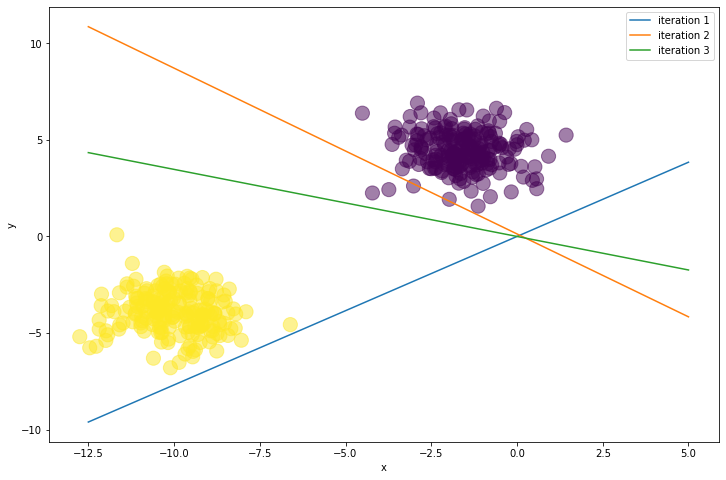

In [78]:
plot2D( X,y,model.w_list)

> ### I.11 Plotting the Animated plot (GIF)

In [79]:
from IPython.display import HTML
from matplotlib.animation import FuncAnimation

# Turn off matplotlib plot in Notebook
plt.ioff()
# Pass the ffmpeg path
#plt.rcParams['animation.ffmpeg_path'] = '/Users/hp/anaconda3/Lib/site-packages/ffmpeg'

x1=[]
y1=[]
for point in X:
    x1.append(point[0])
    y1.append(point[1])
colors = y

fig, ax = plt.subplots(figsize=(12,8))
fig.set_tight_layout(True)

ax.scatter(x1, y1, s=200 ,c = y, alpha=0.5)
alpha = 1 #-w[0][1]/w[0][2]
beta =  1 #-w[0][0]/w[0][2]
decision_boundary = lambda x : alpha*x + beta
x2 = np.array([-12,5])
y2 = decision_boundary(x2)

line, = ax.plot(x2, y2, 'r-', linewidth=2)
def update(w):
    alpha = -w[0][1]/w[0][2]
    beta = -w[0][0]/w[0][2]
    decision_boundary = lambda x : alpha*x + beta
    y2 = decision_boundary(x2)
    line.set_ydata(y2)
    


anim = FuncAnimation(fig, update, repeat=True, frames=model.w_list, interval=1000)
anim.save('Perceptron2D.gif', writer='imagemagick', fps=0.5)
plt.close()

MovieWriter imagemagick unavailable; using Pillow instead.


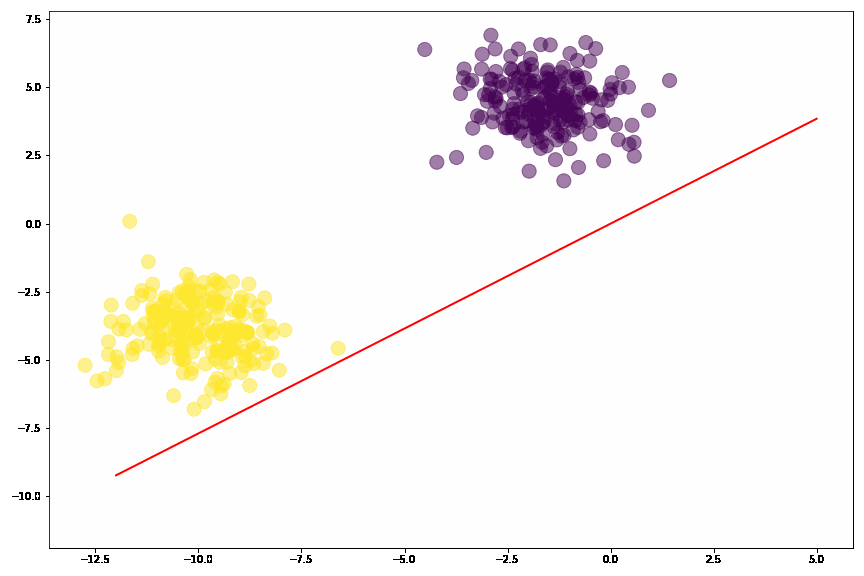

# II. Pocket learning algorithm

<div style="margin-left:60px">
<strong>Input:</strong> $S=\left\{\left(x_1, y_1\right), \ldots,\left(x_n, y_n\right)\right\}$ and $w_0$.<br><br>
<strong>Output:</strong> $w^*, t$ and $L_S\left(w^*\right)$<br><br>
<strong>Start:</strong> $w(0) \leftarrow w_0$<br><br>
    <div style="margin-left:30px">
Initialize the weight vector of pocket by the weight vector of PLA.
$$
w_s \leftarrow w_0
$$<br>
<strong>for</strong> $\mathrm{t}=1, \ldots, T_{\max }$ :<br>
        <div style="margin-left:40px">
Execute PLA for one weight update to obtain $w(\mathrm{t})$.<br>
<strong>Evaluate</strong> $\mathrm{L}_{\mathrm{S}}(w(t))$<br>
if $\mathrm{L}_{\mathrm{S}}(w(t))<\mathrm{L}_{\mathrm{S}}\left(w_s\right)$<br>
$\;\;\;\;w_s \leftarrow w(t)$<br>
<strong>endif</strong><br>
        </div>
<strong>endfor</strong><br>
<strong>Return</strong> $\mathrm{w}^* \leftarrow w_s, t$ and $L_S\left(w^*\right)$<br>
    </div>
<strong>end</strong>
</div>

> ## II.1 Pocket learning algorithm

In [80]:
class Pocket(object):
    
    def __init__(self, max_iter):
        #initialisation du vecteur directeur de l'hyperplan
        self.w = None
        #liste des "w" trouvés pendant chaque itération
        self.w_list = None
        #initialisation du nbre d'iteration par l'utilisateur (max_iter)
        self.max_iter = max_iter
        
    #chagement des labels y=0 en y=-1 dans notre base de donnée
    def _get_cls_map(self, y):
        return np.where(y <= 0, -1, 1)
    
    #Ajout de x0=1 à chaque example de notre base de donnée pour transformer (hs(x)=w.x + b) en (hs(x)=w.x)
    def add_1_x(self, X):
        x=[]
        for i in range(len(X)):
                        x.append(np.insert(X[i],0,1))
        x = np.array(x)
        return x
    
    def solve_optimization_problem( self, X, y):
        
        def indecatrice( w, x, y):
            if np.sign(np.dot(w,x))!=y :
                return 1
            return 0
    
        def Ls( w, x, y):
            n = len(y)
            s=0
            for i in range(n):
                s+= indecatrice( w,x[i],y[i])
            return s/n
        #Pocket
        w1 = np.array([np.zeros(len(X[0]))])
        w1[0][0]=0.1
        w_list=[]
    
        wt = w1.copy()
        for j in range(self.max_iter):
            
            for i in range(len(y)):
                #i=random.random()
                estimator = np.dot(wt,X[i])
                if np.sign(estimator) < 0 and y[i]>0:
                    wt+= X[i]
                elif np.sign(estimator) > 0 and y[i]<0:
                    wt-= X[i]
                if Ls(wt, X, y)<Ls(w1, X, y) :
                    w1 = wt.copy()
                    w_list.append(w1)

            
        #Assigner les valeurs optimales
        self.w= np.array(w1)
        self.w_list = w_list
        
    #méthode d'entrainement
    def fit(self, X, y):
            y = self._get_cls_map(y)
            X = self.add_1_x( X )
            self.solve_optimization_problem(X,y)
            
    #méthode de prédiction
    def predict(self, X):
        X = self.add_1_x(X)
        estimate = np.dot(X,(self.w).T)
        prediction = np.sign(estimate)
        return np.where(prediction == -1, 0, 1).T
    
    #General Error
    def accuracy(self,y_true, y_pred):
        accuracy = np.sum(y_true==y_pred) / len(y_true)
        return accuracy


> ### II.2  Generating a non linearly separable (noisy) dataset 

In [81]:
np.random.seed(0)
X=np.array([[-0.77653462, -1.76676856],
       [ 1.31480261, -1.32745378],
       [-0.81123925, -0.67986712],
       [ 1.91694867, -1.6599487 ],
       [-0.19468199, -1.33727661],
       [ 2.83010233,  0.43049509],
       [ 1.2741358 , -0.58728677],
       [ 0.1587766 ,  0.84431014],
       [-1.56068564, -1.29936497],
       [-0.21974939, -1.16094751],
       [-0.5935691 , -1.54254941],
       [ 0.33564679, -0.60148532],
       [-0.57415246,  1.26522078],
       [ 1.72305766,  1.51790662],
       [-1.58411805, -0.66931982],
       [ 1.57054243, -0.98425197],
       [ 0.54174332, -1.07782211],
       [ 0.54309691,  0.66143595],
       [ 1.79022524,  1.80597759],
       [-1.00013348,  0.32830595],
       [-1.49895481, -0.85283815],
       [ 1.10832789, -1.6523427 ],
       [-1.97107947, -1.29503691],
       [-0.45439286,  1.6755548 ],
       [-0.97483312,  0.93419291],
       [ 0.73102938, -1.39979353],
       [-1.32093769, -1.95289308],
       [ 0.64000688,  1.15479203],
       [ 1.15665497,  1.12203097],
       [ 0.10349708,  1.13618392],
       [-1.8772425 ,  2.80280889],
       [-0.69067583, -0.24090055],
       [-1.71172162, -1.36080809],
       [-0.36551575,  1.68597564],
       [ 0.13945338,  0.07833992],
       [-1.67986965,  0.51770032],
       [-0.80204854, -0.86027948],
       [-0.68489991,  0.27878456],
       [ 1.38440936, -1.32421466],
       [-1.93387441,  1.91363366],
       [-0.89107725,  1.50747386],
       [-0.34979529, -0.55520347],
       [ 0.12888045,  2.29778138],
       [-0.44518251,  1.55879059],
       [-0.82942575, -0.46483013],
       [ 1.17288821, -0.27822978],
       [ 0.5118538 , -1.96754755],
       [ 1.0094058 , -0.82131697],
       [-0.38519034,  2.11460754],
       [ 0.62814203, -0.01439766]])
# On définit les labels associés aux données d'apprentissage, c'est un problème de classification binaire, ces données sont choisis de telle sorte qu'on ne peut pas les séparer en deux classes linéarement par un hyperplan càd on a du bruit. 
y= np.array([0, 0, 0, 0, 0,  1, 0,  1, 0,  1, 0, 0,  1,  1, 0, 0, 0,
        1,  1,  1, 0, 0, 0,  1,  1, 0, 0,  1,  1,  1,  1, 0, 0,  1,
        1,  1, 0,  1, 0,  1,  1,  1,  1,  1, 0, 0, 0, 0,  1,  1])

> ### II.3 Splitting the dataset into trainning and testing sets

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=1)

> ### II.4 Training Pocket learning algorithm

In [83]:
model2 = Pocket(max_iter=5)
model2.fit(X_train,y_train)

> ### II.5 Testing Pocket learning algorithm 

>> ### II.5.1 Testing on trainning data (Ls)

In [84]:
pred_train = model2.predict(X_train)

>> ### II.5.2 Testing on testing data (L(D,s))

In [85]:
pred_test = model2.predict(X_test)

> ### II.6 Measuring the empirical error (Trainning Accuracy) 

In [86]:
accuracy = model2.accuracy(y_train,pred_train)
print("Trainnig Accuracy : ",accuracy)

Trainnig Accuracy :  0.95


> ### II.7 Measuring the general error (Testing Accuracy) 

In [87]:
accuracy = model2.accuracy(y_test,pred_test)
print("Testing Accuracy : ",accuracy)

Testing Accuracy :  1.0


> ### II.8 Plotting the hyperplans calculated in each iteration

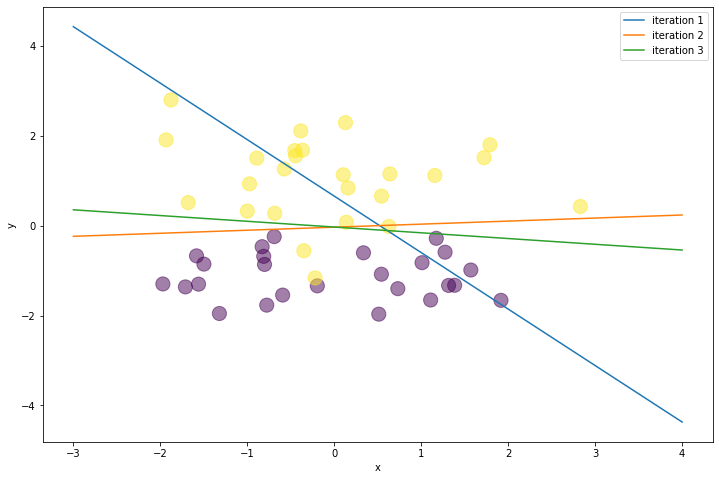

In [88]:
plot2D( X,y,model2.w_list,"Pocket")

> ### II.9 Plotting the Animated plot (GIF)

In [89]:
from IPython.display import HTML
from matplotlib.animation import FuncAnimation

# Turn off matplotlib plot in Notebook
plt.ioff()
# Pass the ffmpeg path
#plt.rcParams['animation.ffmpeg_path'] = '/Users/hp/anaconda3/Lib/site-packages/ffmpeg'

x1=[]
y1=[]
for point in X:
    x1.append(point[0])
    y1.append(point[1])
colors = y

fig, ax = plt.subplots(figsize=(12,8))
fig.set_tight_layout(True)

ax.scatter(x1, y1, s=200 ,c = y, alpha=0.5)
alpha = 1 #-w[0][1]/w[0][2]
beta =  1 #-w[0][0]/w[0][2]
decision_boundary = lambda x : alpha*x + beta
x2 = np.array([-3,2.5])
y2 = decision_boundary(x2)

line, = ax.plot(x2, y2, 'r-', linewidth=2)
def update(w):
    alpha = -w[0][1]/w[0][2]
    beta = -w[0][0]/w[0][2]
    decision_boundary = lambda x : alpha*x + beta
    y2 = decision_boundary(x2)
    line.set_ydata(y2)
    


anim = FuncAnimation(fig, update, repeat=True, frames=model2.w_list, interval=1000)
anim.save('Pocket2D.gif', writer='imagemagick', fps=0.5)
plt.close()

MovieWriter imagemagick unavailable; using Pillow instead.


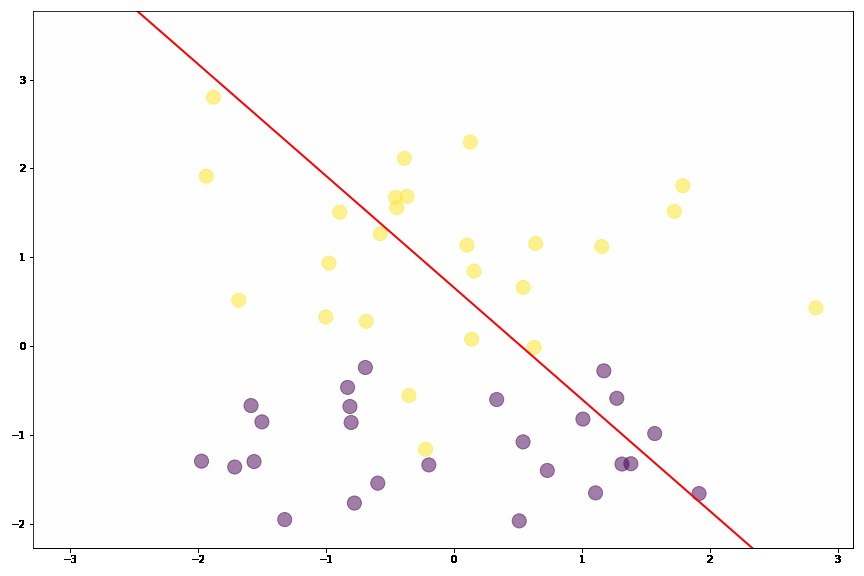

## III. Delta rule learning algorithm

<div style="margin-left:60px">
<strong>Input:</strong> $S=\left\{\left(x_1, y_1\right), \ldots,\left(x_n, y_n\right)\right\}$ and $w_0$.<br><br>
<strong>Output:</strong> $w^*, t$ and $L_S\left(w^*\right)$<br><br>
<strong>Start:</strong> $w \leftarrow w_0$<br><br>
<div style="margin-left:40px">
<strong>Compute:</strong> $\quad L_S(w)=\frac{1}{n} \sum_{i=1}^n\left(y_i-w^T x_i\right)^2$<br><br>
<strong>for</strong> $\mathrm{t}=1, \ldots, T_{\max }$ :<br>
<div style="margin-left:40px">
<strong>for</strong> $i=1, \ldots, n$ :<br>
<div style="margin-left:40px">

<strong>if</strong> $\left(\mathrm{e}=\mathrm{y}_{\mathrm{i}}-w^T x_i\right) !=0$<br>
$\;\;\;w \leftarrow w+2 \cdot$ e. $x_i$<br>
<strong>endif</strong><br>
    </div>
<strong>endfor</strong><br>
        </div>

<strong>endfor</strong><br>
<strong>Return</strong> $\mathrm{w}^* \leftarrow w, t$ and $L_S\left(w^*\right)$<br>
</div>
<strong>end</strong><br>
</div>

> ## III.1 Delta rule learning algorithm

In [90]:
class Adalane(object):
    
    def __init__(self, max_iter):
        #initialisation du vecteur directeur de l'hyperplan
        self.w = None
        #liste des "w" trouvés pendant chaque itération
        self.w_list = None
        #initialisation du nbre d'iteration
        self.max_iter = max_iter
        
    #chagement des labels y=0 en y=-1 dans notre base de donnée    
    def _get_cls_map(self, y):
        return np.where(y <= 0, -1, 1)
    
    #Ajout de x0=1 à chaque example de notre base de donnée pour transformer (hs(x)=w.x + b) en (hs(x)=w.x)
    def add_1_x(self, X):
        x=[]
        for i in range(len(X)):
                        x.append(np.insert(X[i],0,1))
        x = np.array(x)
        return x
    
    def solve_optimization_problem( self, X, y):
    
        w = np.array([np.zeros(len(X[0]))])
        w[0][0]=5
        w_list = []
    
        
        #Adaline 
        for i in range(self.max_iter):
            for j in range(len(y)):
                e =y[j]- np.dot(w,X[j])
                if  e :
                    w=w+0.1*e[0]*X[j]*(1/np.dot(X[j],X[j]))
            w_list.append(w)

        self.w= np.array(w)
        self.w_list = w_list
        
    #méthode d'entrainement    
    def fit(self, X, y):
            y = self._get_cls_map(y)
            X = self.add_1_x( X )
            self.solve_optimization_problem(X,y)
    
    #méthode de prédiction
    def predict(self, X):
        X = self.add_1_x(X)
        estimate = np.dot(X,(self.w).T)
        prediction = np.sign(estimate)
        return np.where(prediction == -1, 0, 1).T
    
    #General Error
    def accuracy(self,y_true, y_pred):
        accuracy = np.sum(y_true==y_pred) / len(y_true)
        return accuracy


> ### III.2  Generating a noisy dataset

In [91]:
X=np.array([[-0.77653462, -1.76676856],
       [ 1.31480261, -1.32745378],
       [-0.81123925, -0.67986712],
       [ 1.91694867, -1.6599487 ],
       [-0.19468199, -1.33727661],
       [ 2.83010233,  0.43049509],
       [ 1.2741358 , -0.58728677],
       [ 0.1587766 ,  0.84431014],
       [-1.56068564, -1.29936497],
       [-0.21974939, -1.16094751],
       [-0.5935691 , -1.54254941],
       [ 0.33564679, -0.60148532],
       [-0.57415246,  1.26522078],
       [ 1.72305766,  1.51790662],
       [-1.58411805, -0.66931982],
       [ 1.57054243, -0.98425197],
       [ 0.54174332, -1.07782211],
       [ 0.54309691,  0.66143595],
       [ 1.79022524,  1.80597759],
       [-1.00013348,  0.32830595],
       [-1.49895481, -0.85283815],
       [ 1.10832789, -1.6523427 ],
       [-1.97107947, -1.29503691],
       [-0.45439286,  1.6755548 ],
       [-0.97483312,  0.93419291],
       [ 0.73102938, -1.39979353],
       [-1.32093769, -1.95289308],
       [ 0.64000688,  1.15479203],
       [ 1.15665497,  1.12203097],
       [ 0.10349708,  1.13618392],
       [-1.8772425 ,  2.80280889],
       [-0.69067583, -0.24090055],
       [-1.71172162, -1.36080809],
       [-0.36551575,  1.68597564],
       [ 0.13945338,  0.07833992],
       [-1.67986965,  0.51770032],
       [-0.80204854, -0.86027948],
       [-0.68489991,  0.27878456],
       [ 1.38440936, -1.32421466],
       [-1.93387441,  1.91363366],
       [-0.89107725,  1.50747386],
       [-0.34979529, -0.55520347],
       [ 0.12888045,  2.29778138],
       [-0.44518251,  1.55879059],
       [-0.82942575, -0.46483013],
       [ 1.17288821, -0.27822978],
       [ 0.5118538 , -1.96754755],
       [ 1.0094058 , -0.82131697],
       [-0.38519034,  2.11460754],
       [ 0.62814203, -0.01439766]])
# On définit les labels associés aux données d'apprentissage, c'est un problème de classification binaire, ces données sont choisis de telle sorte qu'on ne peut pas les séparer en deux classes linéarement par un hyperplan càd on a du bruit. 
y= np.array([0, 0, 0, 0, 0,  1, 0,  1, 0,  1, 0, 0,  1,  1, 0, 0, 0,
        1,  1,  1, 0, 0, 0,  1,  1, 0, 0,  1,  1,  1,  1, 0, 0,  1,
        1,  1, 0,  1, 0,  1,  1,  1,  1,  1, 0, 0, 0, 0,  1,  1])

> ### III.3 Splitting the dataset into trainning and testing sets

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=1)

> ### III.4 Training Adaline learning algorithm

In [93]:
model3= Adalane(max_iter = 3)
model3.fit(X_train,y_train)

> ### II.5 Testing Adaline learning algorithm 

>> ### II.5.1 Testing on trainning data (Ls)

In [94]:
pred_train = model3.predict(X_train)

>> ### II.5.2 Testing on testing data (L(D,s))

In [95]:
pred_test = model3.predict(X_test)

> ### II.6 Measuring the empirical error (Trainning Accuracy) 

In [96]:
accuracy = model3.accuracy(y_train,pred_train)
print("Trainnig Accuracy : ",accuracy)

Trainnig Accuracy :  0.925


> ### II.7 Measuring the general error (Testing Accuracy) 

In [97]:
accuracy = model3.accuracy(y_test,pred_test)
print("Testing Accuracy : ",accuracy)

Testing Accuracy :  0.9


> ### III.8 Plotting the hyperplans calculated in each iteration

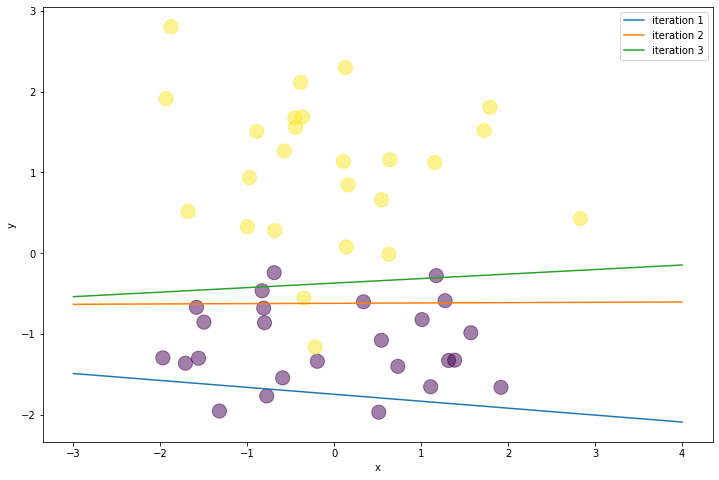

In [98]:
plot2D( X,y,model3.w_list,"Adaline")

> ### III.9 Plotting the Animated plot (GIF)

In [100]:
from IPython.display import HTML
from matplotlib.animation import FuncAnimation

# Turn off matplotlib plot in Notebook
plt.ioff()
# Pass the ffmpeg path
#plt.rcParams['animation.ffmpeg_path'] = '/Users/hp/anaconda3/Lib/site-packages/ffmpeg'

x1=[]
y1=[]
for point in X:
    x1.append(point[0])
    y1.append(point[1])
colors = y

fig, ax = plt.subplots(figsize=(12,8))
fig.set_tight_layout(True)

ax.scatter(x1, y1, s=200 ,c = y, alpha=0.5)
alpha = 1 #-w[0][1]/w[0][2]
beta =  1 #-w[0][0]/w[0][2]
decision_boundary = lambda x : alpha*x + beta
x2 = np.array([-3,2.5])
y2 = decision_boundary(x2)

line, = ax.plot(x2, y2, 'r-', linewidth=2)
def update(w):
    alpha = -w[0][1]/w[0][2]
    beta = -w[0][0]/w[0][2]
    decision_boundary = lambda x : alpha*x + beta
    y2 = decision_boundary(x2)
    line.set_ydata(y2)
    


anim = FuncAnimation(fig, update, repeat=True, frames=model3.w_list, interval=1000)
anim.save('Adaline2D.gif', writer='imagemagick', fps=0.5)
plt.close()

MovieWriter imagemagick unavailable; using Pillow instead.


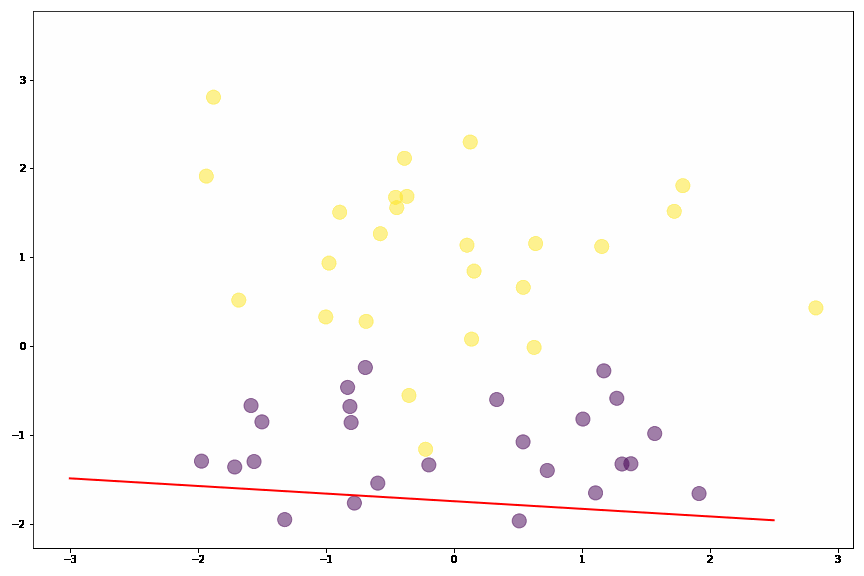

# IV.References:
[1] Prof. Abdellatif EL AFIA - Part 1: Machine learning theory 
<br>
[2] STEPHEN I. GALLANT - Cornell University: Perceptron-Based Learning Algorithms 
<br>
[3] Shashank Kumar - Maximum margin classifiers are solutions to optimization problems: https://towardsdatascience.com/building-the-optimization-problem-of-maximum-margin-classifiers-8da3d2c87369